

<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Presentado por Joan Mauricio Yanza Ruiz

# Laboratorio 09 Matrices

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

## Punto 1: **Modelo de encriptación**


Un proceso para encriptar un mensaje secreto es usar cierta matriz cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc. y espacio=27, se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamaño de la matriz de código, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.

La persona que debe recibir el mensaje conoce la matriz de código. El o ella arreglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el número de elementos en una fila conicide con el tamaño de la matriz de código multiplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

```
47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588,
```


la primera fila del mensaje es `47,49,-19,257,487`

*¿Cual es el mensaje?*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import sympy as sy
from scipy.linalg import expm


In [3]:
A = np.matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])

In [4]:
"""Mensaje recibido"""
B = np.matrix([[ 47,49,-19,257,487],
        [10,-9,63,137,236],
        [ 79,142,-184,372,536],
        [ 59,70,-40,332,588],])

In [5]:
#INVERTIR A, PRODUCTO @, 1-27: ARRAY A=1,B=2, SIN Ñ
inverso = A.I

producto = B @ inverso

codigo = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10,
    'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19,
    'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, " ":27
}


In [6]:
""" voy a concatenar las filas de la matriz resultante en un arreglo llamado prod"""
producto_linea1 = np.concatenate((producto[0,:], producto[1,:]),axis=1)
producto_linea2 = np.concatenate((producto[2,:], producto[3,:]),axis=1)
producto_linea = np.concatenate((producto_linea1, producto_linea2),axis=1)
prod = np.array(producto_linea)


In [7]:
""" convierto en enteros a los valores de ese arreglo llamado prod"""
pro = np.zeros(len(prod[0]))
for i in range(len(prod[0])):
  pro[i] = round(prod[0][i],0)


""" a partir del diccionario llamado codigo se codifica el mensaje oculto en el arreglo llamado prod """
s=""
for i in range(len(prod[0])):
  s = s+ (list(codigo.keys())[list(codigo.values()).index(pro[i])])

print("El mensaje oculto es ", s)


El mensaje oculto es  ARE YOU HAVING FUN  


## Punto 2: **Operaciones matricial con regresión lineal.**

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y minimizar el conjunto de parámetros de la regresión emplando algún método de minimización; otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


$$\Theta = (X^T X)^{-1} X^T y$$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, $X$ la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en $N$ dimensiones; la recta, plano o hiperplano puede ser calculado como:

$$Y=\Theta^T X$$


En el caso de dos dimensiones, supongamos que $X$, e $Y$ presentan un comportamiento lineal, y vienen dados por (en este caso el super indice es):


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

$$\Theta = (X^T X)^{-1} X^T y$$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:

In [8]:
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise

In [9]:
X = np.zeros((len(x1),2))
X[:,0]=1
X[:,1]= x1
X= np.matrix(X)
#X = sy.Matrix(X)
X

matrix([[ 1.        ,  0.        ],
        [ 1.        ,  1.11111111],
        [ 1.        ,  2.22222222],
        [ 1.        ,  3.33333333],
        [ 1.        ,  4.44444444],
        [ 1.        ,  5.55555556],
        [ 1.        ,  6.66666667],
        [ 1.        ,  7.77777778],
        [ 1.        ,  8.88888889],
        [ 1.        , 10.        ]])

In [10]:
theta = (X.T @ X).I @ X.T @ y

theta

matrix([[-0.51119498,  0.93812873]])

ahora le ecuacion $Y=\Theta^T X$

In [11]:
Y = theta @ X.T
Y

matrix([[-0.51119498,  0.53117028,  1.57353554,  2.6159008 ,  3.65826606,
          4.70063132,  5.74299658,  6.78536183,  7.82772709,  8.87009235]])

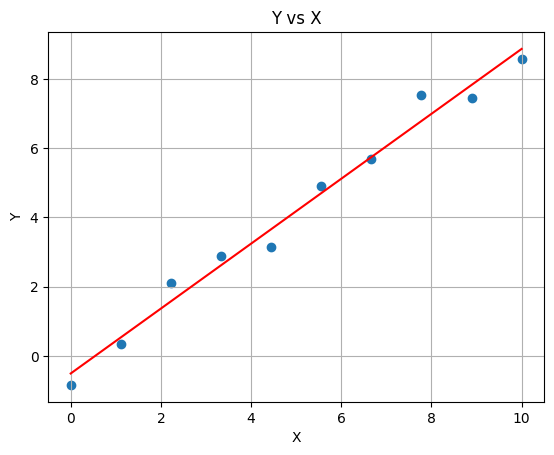

In [14]:
plt.scatter(x1,y)
plt.plot(x1,Y.T, color="red")
plt.title("Y vs X")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()


Generalice para el siguiente problema bidimensional:

In [ ]:
N = 20
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

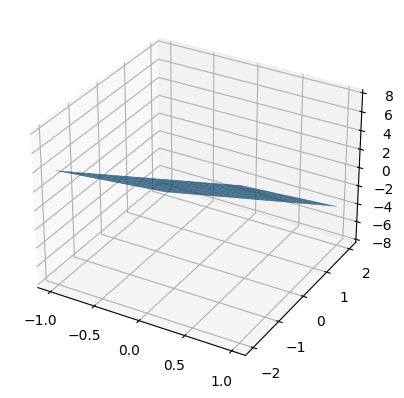

In [ ]:
N = 20
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
# scatter = ax.scatter(x1, x2, y,"-")

###SOLUCION###

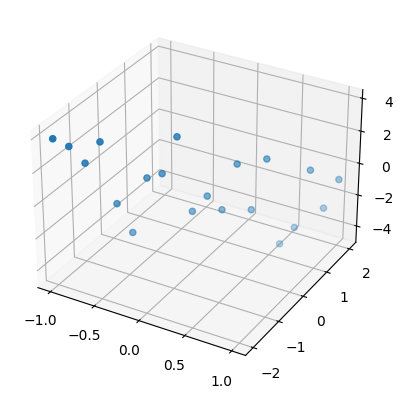

In [ ]:
# esta es la informacion proporcionada en el ejercicio , se grafican solo los puntos dispersos
N = 20
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#surf = ax.plot_surface(X1,X2,Y)
scatter = ax.scatter(x1, x2, y,"-")

In [ ]:
""" Se obtiene la matriz X con la primera columna de unos, la segunda x1 y la tercera x2"""
X = np.zeros((len(x1),3))
X[:,0]=1
X[:,1]= x1
X[:,2]= x2
X= np.matrix(X)
#X = sy.Matrix(X)
X

matrix([[ 1.        , -1.        , -2.        ],
        [ 1.        , -0.89473684, -1.78947368],
        [ 1.        , -0.78947368, -1.57894737],
        [ 1.        , -0.68421053, -1.36842105],
        [ 1.        , -0.57894737, -1.15789474],
        [ 1.        , -0.47368421, -0.94736842],
        [ 1.        , -0.36842105, -0.73684211],
        [ 1.        , -0.26315789, -0.52631579],
        [ 1.        , -0.15789474, -0.31578947],
        [ 1.        , -0.05263158, -0.10526316],
        [ 1.        ,  0.05263158,  0.10526316],
        [ 1.        ,  0.15789474,  0.31578947],
        [ 1.        ,  0.26315789,  0.52631579],
        [ 1.        ,  0.36842105,  0.73684211],
        [ 1.        ,  0.47368421,  0.94736842],
        [ 1.        ,  0.57894737,  1.15789474],
        [ 1.        ,  0.68421053,  1.36842105],
        [ 1.        ,  0.78947368,  1.57894737],
        [ 1.        ,  0.89473684,  1.78947368],
        [ 1.        ,  1.        ,  2.        ]])

In [ ]:
# se construye la matriz Y (en este caso se llama y2 ) con operaciones matriciales
theta2 = ((X.T @ X).I) @ X.T @ y
Y2 = theta2 @ X.T


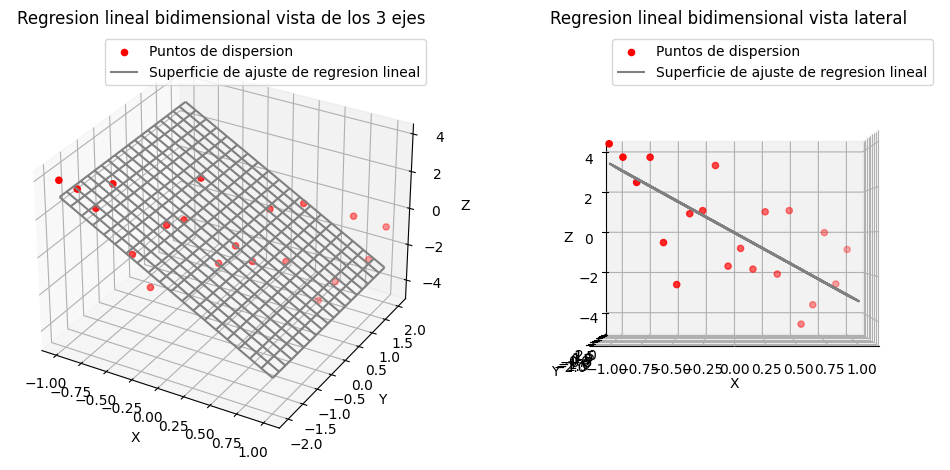

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,10),subplot_kw={"projection": "3d"})
scatter = axs[0].scatter(x1, x2, y, color="red", label="Puntos de dispersion")

# wireframe produce una superficie de ajuste que  no tiene  un relleno de color, esto permite la observacion de los puntos de dispersion
# la informacion sobre wire la obtuve de una inteligencia artificial , hago la aclaracion

wire = axs[0].plot_wireframe(X1, X2, Y2, color='gray', label="Superficie de ajuste de regresion lineal")
axs[0].legend()
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")
axs[0].set_zlabel("Z")
axs[0].set_title("Regresion lineal bidimensional vista de los 3 ejes")

scatter = axs[1].scatter(x1, x2, y, color="red",label="Puntos de dispersion")
wire = axs[1].plot_wireframe(X1, X2, Y2, color='gray',label="Superficie de ajuste de regresion lineal")

# el metodo view_init permite ver a una grafica 3D desde diferentes perspectivas, en este caso, puse una vista lateral de la grafica para observar
# como la superficie de ajuste atraviesa los puntos de dispersion, esta informacion tambien me la proporcionó una inteligencia artifical.

axs[1].view_init(elev=0, azim=270)
axs[1].legend()
axs[1].legend()
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")
axs[1].set_zlabel("Z")
axs[1].set_title("Regresion lineal bidimensional vista lateral")
plt.show();

## Punto 3: **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

a) Diagonalize $A$.

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

a) Diagonalize  A .

In [ ]:
A = np.array([[2, -1, 1],
              [0, 3, -1],
              [2, 1, 3]])


# Calculo de  autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)
P = autovectores.copy()
print("Los autovalores son :", autovalores)
print("Los autovectores son :\n", autovectores)


Los autovalores son : [4.+0.00000000e+00j 2.+1.68652966e-08j 2.-1.68652966e-08j]
Los autovectores son :
 [[-0.57735027+0.00000000e+00j -0.57735027+9.73718355e-09j
  -0.57735027-9.73718355e-09j]
 [ 0.57735027+0.00000000e+00j  0.57735027+0.00000000e+00j
   0.57735027-0.00000000e+00j]
 [-0.57735027+0.00000000e+00j  0.57735027-9.73718355e-09j
   0.57735027+9.73718355e-09j]]


In [ ]:
# se halla la matriz diagonal con P:
D = (np.linalg.inv(P))@ A @P
D

array([[ 4.00000000e+00+0.00000000e+00j, -1.52842194e-16-2.31659544e-24j,
        -1.52842194e-16+2.31659544e-24j],
       [-2.38477860e-16-2.55204589e-08j,  2.00000000e+00+4.98918440e-09j,
         4.44089210e-16-1.14010335e-08j],
       [-6.61406338e-16+2.55204589e-08j,  4.44089210e-16+1.18761122e-08j,
         2.00000000e+00-5.46426318e-09j]])

b) Use el hecho de que  f(A)=Uf(D)U−1  para encontrar  x(t),y(t),z(t)  en el intervalo de tiempo  [0,2]

Sea  $f(A) = e^{At}$.

con:   \begin{equation}
e^{At} = Ue^{Dt}U^{-1}
\end{equation}

por otro lado:
\begin{equation}
f(D) = e^D = \begin{bmatrix}
e^{\lambda_1} & 0 & \cdots & 0 \\
0 & e^{\lambda_2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & e^{\lambda_n}
\end{bmatrix}
\end{equation}

In [ ]:
t = np.linspace(0,2,5)
U= np.linalg.eig(A)[1]
U_inv = np.linalg.inv(U)

In [ ]:
def posiciones(t,A):

  U = np.linalg.eig(A)[1]
  U_inv = np.linalg.inv(U)
  eAt= U@ expm(D*t) @ U_inv
  return eAt


In [ ]:
r0 = np.matrix(['x0', 'y0','z0'])
r0 = r0.T


In [ ]:
r=[]
for i in range(len(t)):
  r.append(sp.Matrix(posiciones(t[i],A)) @  r0)

x=[]
for i in range(len(t)):
  x.append(r[i][0])

y=[]
for i in range(len(t)):
  y.append(r[i][1])

z=[]
for i in range(len(t)):
  z.append(r[i][2])

In [ ]:
""" para t= 0, 0.5, 1, 1.5 y 2 segundos le corresponden los x(t) respectivamente"""
sp.Matrix(x)

Matrix([
[                            x0*(1.0 + 9.26838369921752e-11*I) + 9.26838369921748e-11*I*y0 + z0*(-1.60194519634051e-16 - 2.33633615199629e-24*I)],
[ x0*(3.69452804946532 + 6.07358466573842e-9*I) + y0*(-1.35914091422952 + 6.07358466573843e-9*I) + z0*(2.3353871352358 - 9.86591008269682e-24*I)],
[x0*(23.6045469671069 - 5.07369915183053e-8*I) + y0*(-7.38905609893065 - 5.07369915183053e-8*I) + z0*(23.6045469671069 - 3.51832847115847e-23*I)],
[x0*(181.628859823179 + 1.86205366148001e-8*I) + y0*(-30.1283053847815 + 1.86205366148004e-8*I) + z0*(191.671628284773 - 2.19118854867299e-22*I)],
[ x0*(1408.58176847116 + 4.76040822882933e-7*I) + y0*(-109.196300066288 + 4.76040822882936e-7*I) + z0*(1463.1799185043 - 2.54800442891772e-21*I)]])

In [ ]:
""" para t= 0, 0.5, 1, 1.5 y 2 segundos le corresponden los y(t) respectivamente"""
sp.Matrix(y)

Matrix([
[            x0*(1.38930431494823e-16 - 1.853838691109e-9*I) + y0*(1.0 - 1.853838691109e-9*I) + z0*(9.9228719541567e-17 + 4.46545881381745e-25*I)],
[x0*(-0.976246221006278 - 5.81520451277666e-9*I) + y0*(4.07742274268857 - 5.81520451277666e-9*I) + z0*(-2.3353871352358 + 1.31154043432307e-24*I)],
[x0*(-16.2154908681763 + 6.99055353881371e-9*I) + y0*(14.7781121978613 + 6.99055353881378e-9*I) + z0*(-23.6045469671069 - 7.92445602688679e-23*I)],
[x0*(-161.543322899992 - 4.41531735928112e-8*I) + y0*(50.2138423079692 - 4.41531735928107e-8*I) + z0*(-191.671628284773 - 3.47651415471508e-22*I)],
[ x0*(-1353.98361843802 - 2.21660921928067e-7*I) + y0*(163.794450099433 - 2.21660921928062e-7*I) + z0*(-1463.1799185043 - 4.66476010567606e-21*I)]])

In [ ]:
""" para t= 0, 0.5, 1, 1.5 y 2 segundos le corresponden los z(t) respectivamente"""
sp.Matrix(z)

Matrix([
[    x0*(2.22044604925031e-16 + 1.33335952597457e-10*I) + y0*(2.22044604925031e-16 + 1.33335952597457e-10*I) + z0*(1.0 + 1.7952282728508e-24*I)],
[ x0*(3.69452804946533 - 5.16950550737989e-9*I) + y0*(1.35914091422952 - 5.1695055073799e-9*I) + z0*(5.05366896369484 + 1.43783123624991e-23*I)],
[x0*(30.9936030660376 + 4.21643844329673e-8*I) + y0*(7.38905609893066 + 4.21643844329673e-8*I) + z0*(30.9936030660375 - 3.22621512671412e-24*I)],
[x0*(221.799933669555 + 8.07635911283659e-8*I) + y0*(30.1283053847815 + 8.07635911283655e-8*I) + z0*(211.757165207961 + 3.85765108595679e-22*I)],
[  x0*(1572.37621857059 - 2.57189086883899e-7*I) + y0*(109.196300066289 - 2.571890868839e-7*I) + z0*(1517.77806853745 + 1.14224258342208e-21*I)]])

c) Grafique  x(t),y(t),z(t)  (use la condición inicial  r(0)=(1,1,2)) .

In [ ]:
r02 = np.matrix([1,1,2])
r02 = r02.T
t = np.linspace(0,2,100)

In [ ]:
rs=[]
for i in range(len(t)):
  rs.append(sp.Matrix(posiciones(t[i],A)) @  r02)

xx=[]
for i in range(len(t)):
  xx.append(sp.re(rs[i][0]))

yy=[]
for i in range(len(t)):
  yy.append(sp.re(rs[i][1]))

zz=[]
for i in range(len(t)):
  k = rs[i][2]

  zz.append(sp.re(k))

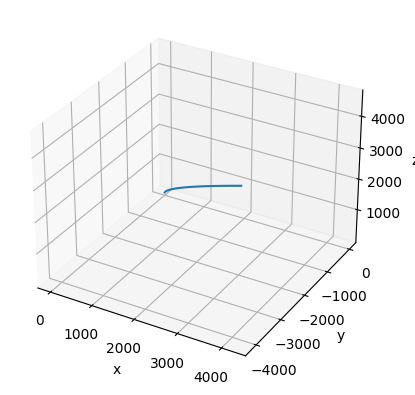

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xx, yy, zz)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

In [ ]:
def x_(t,x0,y0,z0):
  sumando1 = x0 * np.exp(2*t) * (1 + np.exp(2*t) - 2*t)
  sumando2 = y0 * (-2 * t * np.exp(2*t))
  sumando3 = z0 * (np.exp(2*t)) * (-1 + np.exp(2*t))
  x_ = 0.5 * (sumando1 + sumando2 + sumando3)
  return x_

def y_(t,x0,y0,z0):
  sumando1 = x0 * -np.exp(2*t) * (-1 + np.exp(2*t) - 2*t)
  sumando2 = y0 * (2*(t+1)* np.exp(2*t))
  sumando3 = z0 * (-np.exp(2*t)) * (-1 + np.exp(2*t))
  y_ = 0.5 * (sumando1 + sumando2 + sumando3)
  return y_


def z_(t,x0,y0,z0):
  sumando1 = x0 * np.exp(2*t) * (-1 + np.exp(2*t) + 2*t)
  sumando2 = y0 * (2*(t)* np.exp(2*t))
  sumando3 = z0 * (np.exp(2*t)) * (1 + np.exp(2*t))
  z_ = 0.5 * (sumando1 + sumando2 + sumando3)
  return z_

In [ ]:
x_= x_(t,1,1,2)
y_= y_(t,1,1,2)
z_= z_(t,1,1,2)


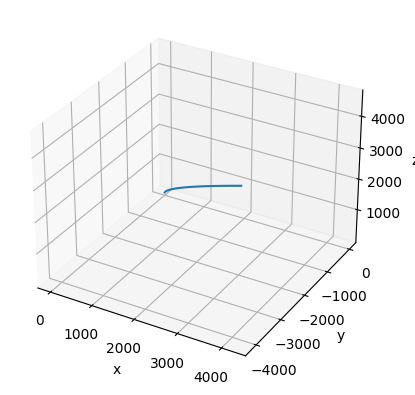

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=-60)
ax.plot(x_, y_, z_)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

Se comparan las graficas: son identicas!!

## Punto 4: **Modelo de población de una especie de pajaros**
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1)
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que:

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix}
0 & 2 \\
0.3 & 0.5
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A

###SOLUCION###

Muestre que la razon  pj,n/pa,n  converge  1.88 ,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero

In [ ]:
""" una matriz A """
A = np.matrix([[0, 2],
              [0.3, 0.5]])


In [ ]:
p0 = np.array([0,10]) #  jovenes y hembras

In [ ]:
def potencia_matrix(A,n):
 return np.linalg.matrix_power(A,n)

In [ ]:
def proporciones(A,n):
  p0 = np.array([0,10])
  # como el numero de aves es entero se toma el menor entero
  p1 = np.array((potencia_matrix(A,n) @ p0).astype(int))
  razon= (p1[0][0] / p1[0][1])
  return razon

In [ ]:
n=100

razones = np.zeros(n)
valores_x = np.zeros(n)
val = np.ones(n) * 1.88
for i in range(1,n):
  razones[i] = proporciones(A,i)
  valores_x[i] = i

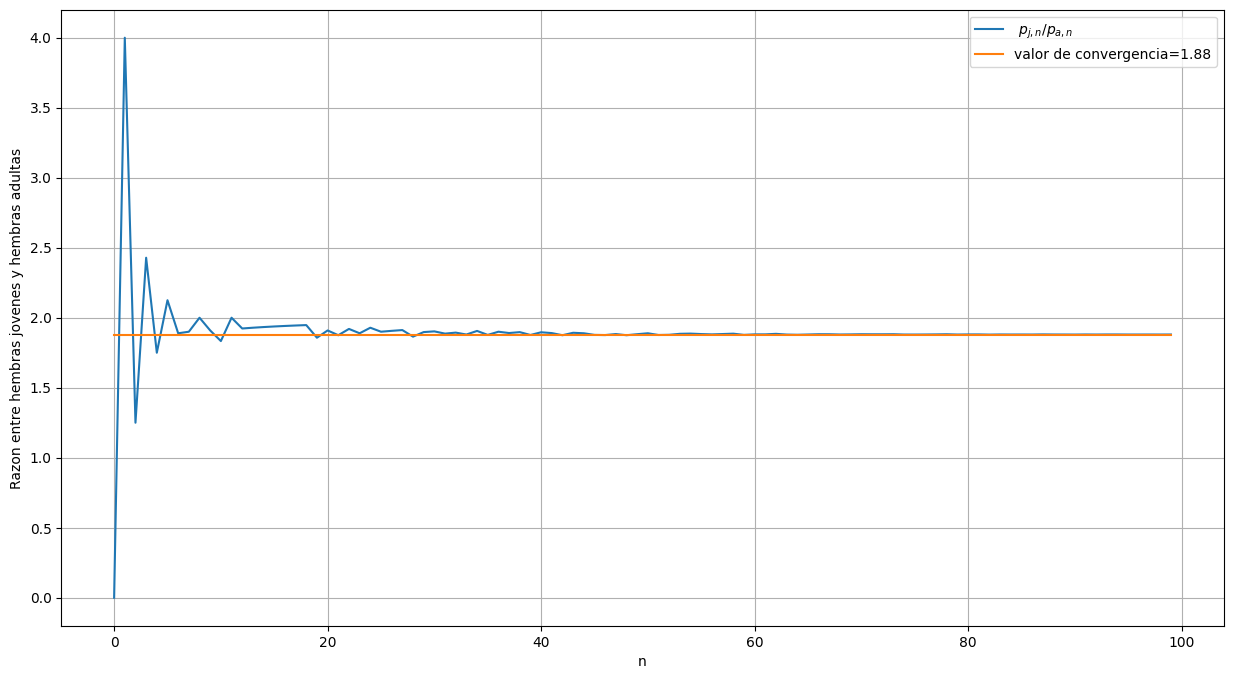

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(valores_x,razones,label=" $ p_{j,n} / p_{a,n}$")
plt.plot(valores_x,val, label="valor de convergencia=1.88")
plt.xlabel("n")
plt.ylabel("Razon entre hembras jovenes y hembras adultas")
plt.legend()
plt.grid()
plt.show()

Se muestra la convergencia grafica a 1.88

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A

In [ ]:
# primerso se hallan los autovectores de A
autovectores = np.linalg.eig(A)[1]
v1=autovectores[0]
v2=autovectores[1]


In [ ]:
# autovalores de A
autovalores = np.linalg.eig(A)[0]
l1 = autovalores[0]
l2 = autovalores[1]



In [ ]:
""" tenemos un sistema de ecuaciones p0 = a1v1 +  a2v2 con incognitas a1, a2. Por su parte v1 y v2 son columnas de la matriz llamada autovectores """
""" hallemos a1,a2"""

solucion = np.linalg.solve(autovectores,p0)
a1 = solucion[0]
a2 = solucion[1]
a1,a2

(12.76497194950322, -13.916151217678744)

La formula que se expone en este ejercicio parece tener problemas, yo propongo esta correccion:

$$ p_n = λ_1^n a_1 v_1 + ( \frac{\lambda_2}{\lambda_1} )^n  a_2 v_2 $$  :(1)  

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce para n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$  (2)


vamos a verificar si esto es verdad

In [ ]:
""" formula (1) """

def pn(l1,l2,a1,a2,v1,v2,n):
  s1 = (((abs(l1))**n) * a1 * v1)
  s2 = (abs((l2/l1))**n)* a2 * v2
  s = s1 + s1
  return s


In [ ]:
pn_original = pn(l1,l2,a1,a2,v1,v2,1000)
pn_original

matrix([[-4.20852682e-248, -3.86038683e-248]])

In [ ]:
""" cuando n es grande, formula (2) """
def pn_ngrande(a1,l1,v1,n):
  pn = a1 * (l1**n) * v1
  return pn


In [ ]:
pn_grande = pn_ngrande(a1,l1,v1,1000)
pn_grande

matrix([[-2.10426341e-248, -1.93019341e-248]])

In [ ]:
""" razon formula 1 """
razon_original = pn_original[0,0] / pn_original[0,1]

In [ ]:
""" razon formula 2 """
razon_ngrande = pn_grande[0,0] / pn_grande[0,1]

In [ ]:
print("La diferencia entre las proporciones es ", razon_original- razon_ngrande)

La diferencia entre las proporciones es  0.0


Esto sugiere que  $p_n=a_1\lambda_1^n\vec{v}_1$ es una buena aproximacion a la formula : $$ p_n = λ_1^n a_1 v_1 + ( \frac{\lambda_2}{\lambda_1} )^n  a_2 v_2 $$  cuando n es grande
